<a href="https://colab.research.google.com/github/Shubhamprdd/Big-Sales-Prediction-Analysis-Python-Project/blob/main/Big_Sales_Prediction_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Big Sales Data - [YBI Foundation] BA Internship Project DataSet.csv')

# Display the first few rows and summary of the dataset
print(data.head())
print(data.info())
print(data.describe())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDT36         12.3          Low Fat         0.111448   
1           FDT36         12.3          Low Fat         0.111904   
2           FDT36         12.3               LF         0.111728   
3           FDT36         12.3          Low Fat         0.000000   
4           FDP12          9.8          Regular         0.045523   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0  Baking Goods   33.4874            OUT049                       1999   
1  Baking Goods   33.9874            OUT017                       2007   
2  Baking Goods   33.9874            OUT018                       2009   
3  Baking Goods   34.3874            OUT019                       1985   
4  Baking Goods   35.0874            OUT017                       2007   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1         436.60872

In [10]:
# Handling missing values in Item_Weight
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

# Standardizing Item_Fat_Content
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular'})


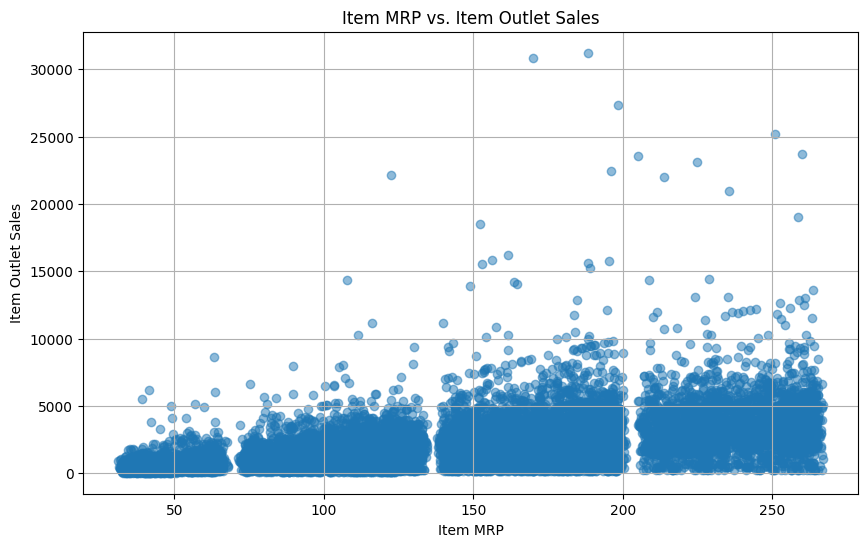

In [11]:
import matplotlib.pyplot as plt

# Scatter plot for Item MRP vs. Sales
plt.figure(figsize=(10, 6))
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'], alpha=0.5)
plt.title('Item MRP vs. Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.grid(True)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Separate the features and target variable
X = data.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
y = data['Item_Outlet_Sales']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Random Forest RMSE: {rmse}')

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance)


Random Forest RMSE: 1354.506645565858
                            Feature  Importance
2                          Item_MRP    0.420660
1                   Item_Visibility    0.206886
0                       Item_Weight    0.062942
28         Outlet_Identifier_OUT027    0.056193
42    Outlet_Type_Supermarket Type3    0.055721
39        Outlet_Type_Grocery Store    0.041404
3         Outlet_Establishment_Year    0.010719
13  Item_Type_Fruits and Vegetables    0.010238
17                   Item_Type_Meat    0.010119
16              Item_Type_Household    0.009569
12           Item_Type_Frozen Foods    0.009003
20            Item_Type_Snack Foods    0.008405
4          Item_Fat_Content_Low Fat    0.007175
5          Item_Fat_Content_Regular    0.007099
11                  Item_Type_Dairy    0.005847
10                 Item_Type_Canned    0.005670
7            Item_Type_Baking Goods    0.004838
15     Item_Type_Health and Hygiene    0.004150
36      Outlet_Location_Type_Tier 1    0.004023
29

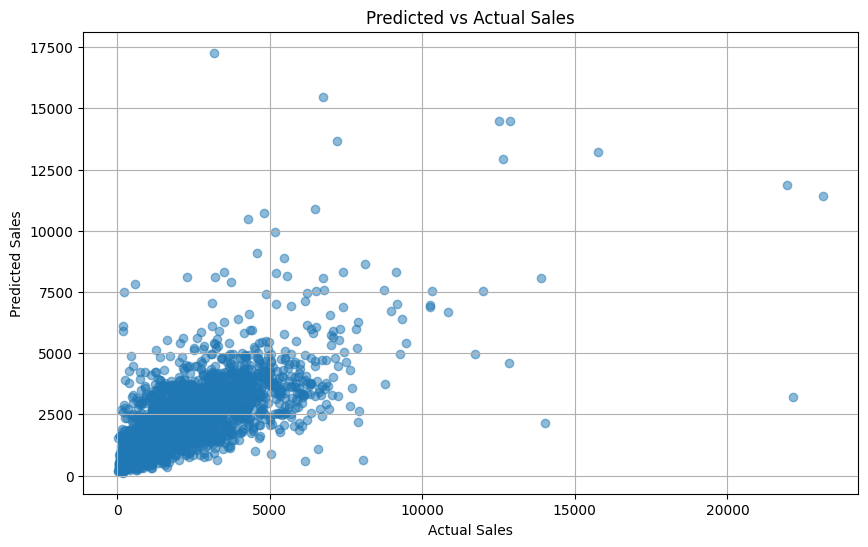

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()
